# ROC and precision-recall curves

Nuha BinTayyash, 2020

This notebook shows the ROC and precision-recall curves resulted from running GPcounts with one sample test on simulated bulk RNA-seq datasets.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
import pandas as pd

low_counts_low_dispersion_non_differentially_expressed_genes_DE_non_DE_genes.csv


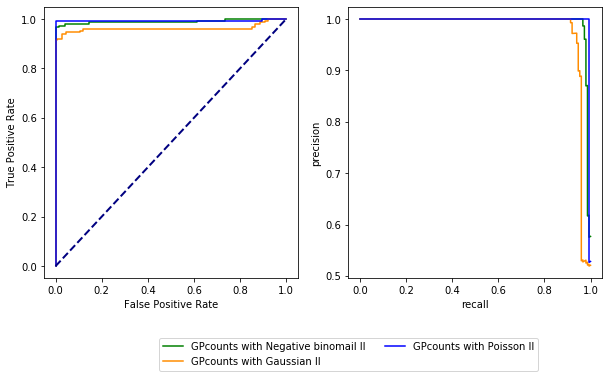

AUC for GPcount with Negative Binomial likelihood 0.989688888888889
AUC for GPcount with Gaussian likelihood 0.9622666666666667
AUC for GPcount with Poisson likelihood 0.9940444444444444


In [3]:
filesname = ['low_counts_low_dispersion_non_differentially_expressed_genes_DE_non_DE_genes.csv']
             #,'low_counts_high_dispersion_non_differentially_expressed_genes_DE_non_DE_genes.csv'                                      
             #,'high_counts_low_dispersion_non_differentially_expressed_genes_DE_non_DE_genes.csv'
             #,'high_counts_high_dispersion_non_differentially_expressed_genes_DE_non_DE_genes.csv']

for file in filesname:
    print(file)
    
    Gaussian = pd.read_csv('ll_Gaussian_'+file,index_col=[0])
    NegativeBinomial = pd.read_csv('ll_Negative_binomial_'+file,index_col=[0])
    Poisson = pd.read_csv('ll_Poisson_'+file,index_col=[0])
    
    D = NegativeBinomial.shape[0]
    true_label = np.zeros(D)
    
    for j in range(D):
        if j %2 == 0:
            true_label[j] = 1

    labels = pd.DataFrame(true_label, index =NegativeBinomial.index.values, columns =['label'])
    NegativeBinomial = pd.concat([NegativeBinomial,labels],axis = 1)

    fig = plt.figure(figsize=(10, 5))
    figsize=(10, 5)
    plt.subplot(1, 2, 1)
    
    fpr_NB, tpr_NB, thresholds_NB = metrics.roc_curve( NegativeBinomial['label'], NegativeBinomial['log_likelihood_ratio'])
    plt.plot(fpr_NB, tpr_NB,color='green',label='GPcounts with Negative binomail ll')

    fpr_G, tpr_G, thresholds_G = metrics.roc_curve(NegativeBinomial['label'],Gaussian['log_likelihood_ratio'])
    plt.plot(fpr_G, tpr_G, color='darkorange', label='GPcounts with Gaussian ll')

    fpr_P, tpr_P, thresholds_P = metrics.roc_curve( NegativeBinomial['label'], Poisson['log_likelihood_ratio'])
    plt.plot(fpr_P, tpr_P,color='blue',label='GPcounts with Poisson ll')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.subplot(1, 2, 2)
    precision_NB, recall_NB, thresholds_NB = metrics.precision_recall_curve( NegativeBinomial['label'], NegativeBinomial['log_likelihood_ratio'])
    plt.plot( recall_NB,precision_NB,color='green',label='GPcounts with Negative binomail ll')

    precision_G, recall_G, thresholds_G = metrics.precision_recall_curve(NegativeBinomial['label'],Gaussian['log_likelihood_ratio'])
    plt.plot(recall_G, precision_G, color='darkorange', label='GPcounts with Gaussian ll')

    precision_P, recall_P, thresholds_P = metrics.precision_recall_curve( NegativeBinomial['label'], Poisson['log_likelihood_ratio'])
    plt.plot( recall_P,precision_P,color='blue',label='GPcounts with Poisson ll')

    plt.xlabel('recall')
    plt.ylabel('precision')
    
    plt.legend(loc='upper center', bbox_to_anchor=(0.0, -0.2), ncol=2)
    plt.show()

    AUC_NB=metrics.auc(fpr_NB, tpr_NB)
    AUC_G=metrics.auc(fpr_G, tpr_G)
    AUC_P=metrics.auc(fpr_P, tpr_P)

    print('AUC for GPcount with Negative Binomial likelihood',AUC_NB)
    print('AUC for GPcount with Gaussian likelihood',AUC_G)
    print('AUC for GPcount with Poisson likelihood',AUC_P)


In [4]:
TP_genes_NB = list(NegativeBinomial.loc[(NegativeBinomial['log_likelihood_ratio'] >= 0)&(NegativeBinomial['label']==1.0)].index.values)
TP_genes_NB

['gene_1',
 'gene_3',
 'gene_5',
 'gene_7',
 'gene_9',
 'gene_11',
 'gene_13',
 'gene_15',
 'gene_17',
 'gene_19',
 'gene_21',
 'gene_23',
 'gene_25',
 'gene_27',
 'gene_29',
 'gene_31',
 'gene_33',
 'gene_35',
 'gene_37',
 'gene_39',
 'gene_41',
 'gene_43',
 'gene_45',
 'gene_47',
 'gene_49',
 'gene_53',
 'gene_55',
 'gene_57',
 'gene_59',
 'gene_61',
 'gene_63',
 'gene_65',
 'gene_67',
 'gene_69',
 'gene_71',
 'gene_73',
 'gene_75',
 'gene_77',
 'gene_79',
 'gene_81',
 'gene_83',
 'gene_85',
 'gene_87',
 'gene_89',
 'gene_91',
 'gene_93',
 'gene_95',
 'gene_97',
 'gene_99',
 'gene_103',
 'gene_105',
 'gene_107',
 'gene_109',
 'gene_111',
 'gene_113',
 'gene_115',
 'gene_117',
 'gene_119',
 'gene_121',
 'gene_123',
 'gene_125',
 'gene_127',
 'gene_129',
 'gene_131',
 'gene_133',
 'gene_135',
 'gene_137',
 'gene_139',
 'gene_141',
 'gene_143',
 'gene_145',
 'gene_147',
 'gene_149',
 'gene_151',
 'gene_153',
 'gene_155',
 'gene_157',
 'gene_159',
 'gene_161',
 'gene_163',
 'gene_167',
 

In [5]:
FP_genes_G = list(Gaussian.loc[(Gaussian['log_likelihood_ratio'] < 0)&(NegativeBinomial['label']==1.0)].index.values)
FP_genes_G

['gene_51', 'gene_165', 'gene_171', 'gene_225', 'gene_237', 'gene_263']

In [6]:
best =set(FP_genes_G).intersection(TP_genes_NB)
best

{'gene_171', 'gene_263'}

In [7]:
NegativeBinomial[['log_likelihood_ratio']].loc[best]

,log_likelihood_ratio
gene_263,4.213557
gene_171,7.000102


In [8]:
Gaussian[['log_likelihood_ratio']].loc[best]

,log_likelihood_ratio
gene_263,-0.954007
gene_171,-0.261204


In [10]:
X = pd.read_csv('time_points.csv',index_col=[0])
Y = pd.read_csv('low_counts_low_dispersion_non_differentially_expressed_genes_DE_non_DE_genes.csv',index_col=[0])

In [15]:
from GPcounts.GPcounts_Module import Fit_GPcounts
likelihood = 'Negative_binomial'
gp_counts = Fit_GPcounts(X,Y.loc[best]) 
log_likelihood = gp_counts.One_sample_test(likelihood)
log_likelihood

100%|██████████| 2/2 [00:06<00:00,  3.01s/it]


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
gene_263,-86.513957,-90.727514,4.213557
gene_171,-69.059480,-76.059582,7.000102


gene_263


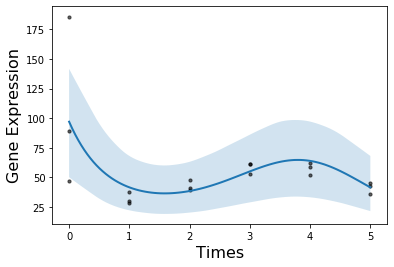

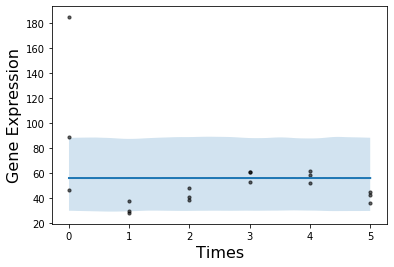

gene_171


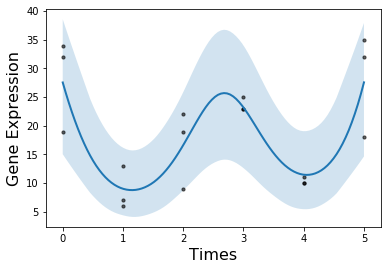

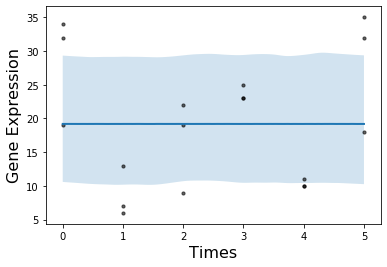

In [16]:
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm

import statsmodels.api as sm

def plot(likelihood,xtest,mean,var):
         
    fig = plt.figure()
    plt.ylabel('Gene Expression', fontsize=16)
    plt.xlabel('Times', fontsize=16)

   
    if likelihood == 'Gaussian':
        y = np.log(Y.loc[[indexes[i]]].values+1)
        plt.fill_between(xtest[:,0],
                            mean[:,0] - 2*np.sqrt(var[:,0]),
                            mean[:,0] + 2*np.sqrt(var[:,0]), alpha=0.2)
    else:
        y = Y.loc[[indexes[i]]].values
        lowess = sm.nonparametric.lowess
        percentile_5 = lowess(np.percentile(var, 5, axis=0),xtest[:,0],frac=1./5, return_sorted=False)
        percentile_95 = lowess(np.percentile(var, 95, axis=0),xtest[:,0],frac=1./5, return_sorted=False)
        plt.fill_between(xtest[:,0],percentile_5,percentile_95,alpha = 0.2)

    plt.scatter(X.values,y, s=10, color='black', alpha=0.6) #data
    plt.plot(xtest, mean, lw=2) 
    plt.show()

indexes = log_likelihood.index.values  # list of genes to be plotted 
test = 'One_sample_test' # name of the test
xtest = np.linspace(np.min(X.values),np.max(X.values),100)[:,None] # points to make prediction
sample = True # sample or/and load model 

for i in range(len(indexes)):
    print(indexes[i])
    params = gp_counts.load_and_sample_models(indexes[i],test,xtest,likelihood,sample)
    for mean,var,model in zip(params['means'],params['vars'],params['models']):
        mean = np.array(mean)
        var = np.array(var)
        plot(likelihood,xtest,mean,var)
        

In [17]:
likelihood = 'Gaussian'
log_likelihood = gp_counts.One_sample_test(likelihood)
log_likelihood

100%|██████████| 2/2 [00:01<00:00,  1.96it/s]


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
gene_263,-14.626795,-13.672788,-0.954007
gene_171,-17.292393,-17.031190,-0.261204


gene_263


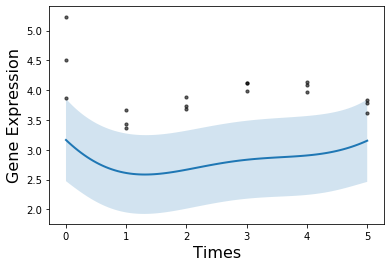

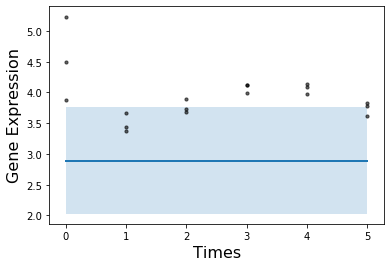

gene_171


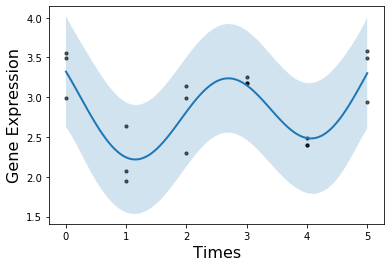

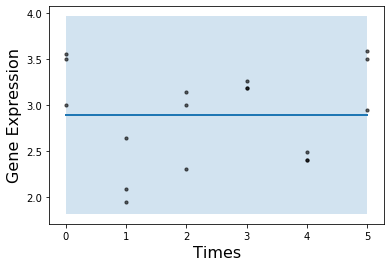

In [18]:
for i in range(len(indexes)):
    print(indexes[i])
    params = gp_counts.load_and_sample_models(indexes[i],test,xtest,likelihood,sample)
    for mean,var,model in zip(params['means'],params['vars'],params['models']):
        mean = np.array(mean)
        var = np.array(var)
        plot(likelihood,xtest,mean,var)
   